# Prophet : Prediction of spares parts

## we focus on the pieces > 50. The main objectives are:
##### 1. See if Prophet can well predict the commande
##### 2. See which pieces work well but which not. Their feutures.

## In this way, we creat 4 lists to save the pieces. 
###### List 1 works best, with prediction error <0.1
###### List 2 works good, with prediction error <0.4
###### List 3 works bad, with prediction error 0.4 ~ 0.9
###### List worst works worst, with prediction error >0.9

#### Then we try to tune the prophet parameters for list 2,3 to have a better result

In [3]:
## import and load in
import pandas as pd
import numpy as np
from fbprophet import Prophet
import os

# select the name whose total command are >100 and save them in PARAs
df1 = pd.read_excel("encoded_pic_septembre_2018.xlsx")
df2=df1.groupby(by=['item',df1.index]).sum()
df3=df2.groupby(['item']).size()
df4 = df3.sort_values()
PARAs = df4[1450:-1].index
# >50: >1450

In [4]:
f=pd.read_csv('LRU_order_among_the_years.csv', header=1)


# delete the first line 
f=f.drop(f.index[0])
f.reset_index(drop=True, inplace=True)

# List to save every prediction errors and we can calculate their mean as overall error afterwards
error_list = []

list1=[]
list2=[]
list3=[]
worst=[]

#choose the spare part we want, delete other colomns  and change the formula to do ''Prophet'' training
for PARA in PARAs:
    df=f[['LRU',PARA]]
    df['ds'] = df['LRU']
    df['y'] = df[PARA]
    df = df.drop(['LRU',PARA],axis=1)
    ## do the sum of commandes and get the new list  
    Sum_Aberaeron = df
    Sum_Aberaeron.reset_index(drop=True, inplace=True)
    Sum_Aberaeron['ds'] = pd.to_datetime(Sum_Aberaeron['ds'])
    Sum_Aberaeron.sort_values('ds',inplace=True)
    Sum_Aberaeron['cumsum']=Sum_Aberaeron['y'].cumsum()
    Sum_Aberaeron['y']=Sum_Aberaeron['cumsum']
    Sum_Aberaeron  =Sum_Aberaeron.drop(['cumsum'],axis=1)
    
    # split the training set and test set: training :'from 2009 to '20171231' , testing :'from 20180101 to '20180926' 
    train=Sum_Aberaeron[Sum_Aberaeron['ds']<'20180101']
    test=Sum_Aberaeron[Sum_Aberaeron['ds']>'20171231']
    
    #prophet traing
    m = Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.5, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000)
    m.fit(train)
    forecast = m.predict(test)
    
 # calculate the grow rate in year 2018  for both the true data and prediction
    firstday = forecast[forecast['ds']=='20180101']
    lastday = forecast[forecast['ds']=='20180926']
    agg_2018_pre= (lastday['yhat'].values[0] - firstday['yhat'].values[0])
    #print(PARA+' predicted command number in 2018 : ' +str(agg_2018_pre))

    # print("Generalization error: %g"%(1.-rf.score(Xtest,ytest)))

    firstday_test = test[test['ds']=='20180101']
    lastday_test = test[test['ds']=='20180926']
    agg_2018 = (lastday_test['y'].values[0] - firstday_test['y'].values[0])
    #print(PARA+' true command number in 2018: ' + str(agg_2018))

    #calculate the prediction error
    error=np.abs(agg_2018-agg_2018_pre)/agg_2018 
    if error<0.1:
        list1.append(PARA)
    else:
        if error<0.4:
            list2.append(PARA)
        else:
            if error<0.9:
                list3.append(PARA)
            else:
                worst.append(PARA)
    print(PARA+' PREDICT_error: ' + str(error ))
    error_list.append(error)

/home/tianyi/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/tianyi/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alliance PREDICT_error: 0.9872853623890192


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Ankeny PREDICT_error: 1.7916100644561415


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Darlington PREDICT_error: 0.41718142089309396


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Greensboro PREDICT_error: 0.37237411872877146


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Chelan PREDICT_error: 25.999650686574483


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Columbiana PREDICT_error: 0.08479858007469829


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Dayton PREDICT_error: 0.7641012339640577


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Clifton PREDICT_error: 0.14438221125041295


/home/tianyi/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cleveland Heights PREDICT_error: inf


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elgin PREDICT_error: 0.24319154775909038


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alice PREDICT_error: 0.9874544496754648


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bucyrus PREDICT_error: 0.46105738139062297


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Ammon PREDICT_error: 0.9981031924219578


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cedar Hills PREDICT_error: 0.006782714641814636


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Ferriday PREDICT_error: 0.1026241211085426


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fowler PREDICT_error: 1.728870457377358


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Groveland PREDICT_error: 0.4838524217466647


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Galesburg PREDICT_error: 0.6529305379885865


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Floresville PREDICT_error: 0.9973445698401174


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gloucester City PREDICT_error: 0.5396696780332981


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gramercy PREDICT_error: 1.9686991530345495


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Glenwood PREDICT_error: 0.23676730706314958


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Camas PREDICT_error: 0.9810013586279934


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Faribault PREDICT_error: 0.31806209567829064


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Charleston PREDICT_error: 0.867669596515641


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cedarhurst PREDICT_error: 0.09256687149789186


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fountain Valley PREDICT_error: 1.0181736876992602


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Columbus PREDICT_error: 0.7921975228214371


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Dickson City PREDICT_error: 0.06862682854388295


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alpine PREDICT_error: 1.0


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Crookston PREDICT_error: 0.38915154012626524


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bay Minette PREDICT_error: 0.047197262615731136


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Garner PREDICT_error: 0.24735898143042667


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Grenoble PREDICT_error: 0.7956037822405733


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Catoosa PREDICT_error: 0.29513664890240937


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Farmers Branch PREDICT_error: 0.2366119989118758


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Buckeye PREDICT_error: 0.5389558137997784


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


El Campo PREDICT_error: 0.048250336068565026


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Erie PREDICT_error: 1.6607285863641827


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cullman PREDICT_error: 0.543789389027584


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fargo PREDICT_error: 0.19025246008620272


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bonita Springs PREDICT_error: 0.3984745806474933


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alamogordo PREDICT_error: 1.6318939368975167


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elkton PREDICT_error: 0.48804121068315354


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gas City PREDICT_error: 0.3263778727074788


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fletcher PREDICT_error: 1.6685499949243352


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Davidson PREDICT_error: 0.7133998954192591


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Florissant PREDICT_error: 0.23609040667401437


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Ellensburg PREDICT_error: 0.13809975634500896


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Center Point PREDICT_error: 0.24218908819681714


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alamo Heights PREDICT_error: 1.403533450188528


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Giffnock PREDICT_error: 0.19004999535862246


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Florida City PREDICT_error: 0.7238032588926647


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Grayslake PREDICT_error: 0.572107762558475


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Altus PREDICT_error: 0.9947138664862303


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


El Monte PREDICT_error: 0.5763072706002866


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Campbellsville PREDICT_error: inf


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Camberwell PREDICT_error: 0.9889829369992654


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Glenn Heights PREDICT_error: 0.3652560326263069


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Flower Mound PREDICT_error: 0.06446156746762963


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Benton Harbor PREDICT_error: 0.41388906989265606


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Canby PREDICT_error: 0.3051649763435662


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Coleraine PREDICT_error: 0.012761207255557431


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fountain Inn PREDICT_error: 0.5826238820165095


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gillespie PREDICT_error: 0.052540993343260546


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elkin PREDICT_error: 0.5563862718393114


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gaffney PREDICT_error: 0.0466816582092477


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bensenville PREDICT_error: 0.5426923043836065


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Carteret PREDICT_error: 0.43518753932944654


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bryan PREDICT_error: 0.5459136828179334


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cartersville PREDICT_error: 3.663839082849506


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Chester PREDICT_error: 0.25697376267203786


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Buellton PREDICT_error: 0.6394394879862956


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cloquet PREDICT_error: inf


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Florham Park PREDICT_error: 0.9587259359296532


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


College Park PREDICT_error: 29.531609955969557


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Darien PREDICT_error: 0.6215477251577709


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gastonia PREDICT_error: 0.09728110091550914


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Grayson PREDICT_error: 0.5004994419382346


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Glendora PREDICT_error: 0.011388187993584245


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Galax PREDICT_error: 0.4175475842920335


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Farmington PREDICT_error: 0.4414422430996992


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Belvidere PREDICT_error: 0.09542007640895327


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fairfield PREDICT_error: 1.0295077143666413


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Dardenne Prairie PREDICT_error: 0.6691324822829059


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


El Paso PREDICT_error: 0.23098008627787733


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fort Bragg PREDICT_error: 0.18182505092931567


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


El Mirage PREDICT_error: 0.10519077795248677


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Glenolden PREDICT_error: 1.812336059589249


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Glens Falls PREDICT_error: 0.31479509986602683


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Grosse Pointe Park PREDICT_error: 0.6943035649013893


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cahokia PREDICT_error: 0.50727664480201


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cameron PREDICT_error: 0.20110574919586605


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Canfield PREDICT_error: 0.029986567008215975


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Benton PREDICT_error: inf


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Camden Town PREDICT_error: 0.3853336863570377


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Calera PREDICT_error: 0.3267099917673833


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cedarburg PREDICT_error: 0.4207720853352802


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Canal Fulton PREDICT_error: 0.8069016586644806


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bay Harbor Islands PREDICT_error: 0.06505990158213747


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elkhart PREDICT_error: 0.2203050339069209


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cheney PREDICT_error: 0.5263505593837445


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


El Dorado PREDICT_error: 0.025323984903977498


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Catasauqua PREDICT_error: 0.6896404396591344


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


El Cerrito PREDICT_error: 0.02934333474851432


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elberton PREDICT_error: 1.057624837577062


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cedar Hill PREDICT_error: 0.04911280118303874


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Farmersville PREDICT_error: 0.06559494128206618


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Farmville PREDICT_error: 0.09409758243137469


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Collegeville PREDICT_error: 0.7037312266709024


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Farmington Hills PREDICT_error: 0.13809600779629613


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elburn PREDICT_error: 0.5140013487233236


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Collingdale PREDICT_error: 0.5019290292480814


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cedar Falls PREDICT_error: 1.1929665458605963


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Catford PREDICT_error: 6.405711844161497


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bennettsville PREDICT_error: inf


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cheraw PREDICT_error: 0.4039377379267867


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cave Creek PREDICT_error: 1.652661526817765


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Crockett PREDICT_error: 0.6042850538338944
Eldridge PREDICT_error: 0.14784454203586817


In [5]:
list1

['Columbiana',
 'Cedar Hills',
 'Cedarhurst',
 'Dickson City',
 'Bay Minette',
 'El Campo',
 'Flower Mound',
 'Coleraine',
 'Gillespie',
 'Gaffney',
 'Gastonia',
 'Glendora',
 'Belvidere',
 'Canfield',
 'Bay Harbor Islands',
 'El Dorado',
 'El Cerrito',
 'Cedar Hill',
 'Farmersville',
 'Farmville']

In [6]:
list2

['Greensboro',
 'Clifton',
 'Elgin',
 'Ferriday',
 'Glenwood',
 'Faribault',
 'Crookston',
 'Garner',
 'Catoosa',
 'Farmers Branch',
 'Fargo',
 'Bonita Springs',
 'Gas City',
 'Florissant',
 'Ellensburg',
 'Center Point',
 'Giffnock',
 'Glenn Heights',
 'Canby',
 'Chester',
 'El Paso',
 'Fort Bragg',
 'El Mirage',
 'Glens Falls',
 'Cameron',
 'Camden Town',
 'Calera',
 'Elkhart',
 'Farmington Hills',
 'Eldridge']

In [7]:
list3

['Darlington',
 'Dayton',
 'Bucyrus',
 'Groveland',
 'Galesburg',
 'Gloucester City',
 'Charleston',
 'Columbus',
 'Grenoble',
 'Buckeye',
 'Cullman',
 'Elkton',
 'Davidson',
 'Florida City',
 'Grayslake',
 'El Monte',
 'Benton Harbor',
 'Fountain Inn',
 'Elkin',
 'Bensenville',
 'Carteret',
 'Bryan',
 'Buellton',
 'Darien',
 'Grayson',
 'Galax',
 'Farmington',
 'Dardenne Prairie',
 'Grosse Pointe Park',
 'Cahokia',
 'Cedarburg',
 'Canal Fulton',
 'Cheney',
 'Catasauqua',
 'Collegeville',
 'Elburn',
 'Collingdale',
 'Cheraw',
 'Crockett']

In [8]:
worst

['Alliance',
 'Ankeny',
 'Chelan',
 'Cleveland Heights',
 'Alice',
 'Ammon',
 'Fowler',
 'Floresville',
 'Gramercy',
 'Camas',
 'Fountain Valley',
 'Alpine',
 'Erie',
 'Alamogordo',
 'Fletcher',
 'Alamo Heights',
 'Altus',
 'Campbellsville',
 'Camberwell',
 'Cartersville',
 'Cloquet',
 'Florham Park',
 'College Park',
 'Fairfield',
 'Glenolden',
 'Benton',
 'Elberton',
 'Cedar Falls',
 'Catford',
 'Bennettsville',
 'Cave Creek']

###### By changing the parameters, we want to see if some pieces in list2 becomes better

In [9]:
f=pd.read_csv('LRU_order_among_the_years.csv', header=1)


# delete the first line 
f=f.drop(f.index[0])
f.reset_index(drop=True, inplace=True)

# List to save every prediction errors and we can calculate their mean as overall error afterwards
list1_2 = []
list2_2 = []
error_list = []

#choose the spare part we want, delete other colomns  and change the formula to do ''Prophet'' training
for PARA in list2:
    df=f[['LRU',PARA]]
    df['ds'] = df['LRU']
    df['y'] = df[PARA]
    df = df.drop(['LRU',PARA],axis=1)
    ## do the sum of commandes and get the new list  
    Sum_Aberaeron = df
    Sum_Aberaeron.reset_index(drop=True, inplace=True)
    Sum_Aberaeron['ds'] = pd.to_datetime(Sum_Aberaeron['ds'])
    Sum_Aberaeron.sort_values('ds',inplace=True)
    Sum_Aberaeron['cumsum']=Sum_Aberaeron['y'].cumsum()
    Sum_Aberaeron['y']=Sum_Aberaeron['cumsum']
    Sum_Aberaeron  =Sum_Aberaeron.drop(['cumsum'],axis=1)
    
    # split the training set and test set: training :'from 2009 to '20171231' , testing :'from 20180101 to '20180926' 
    train=Sum_Aberaeron[Sum_Aberaeron['ds']<'20180101']
    test=Sum_Aberaeron[Sum_Aberaeron['ds']>'20171231']
    
    #prophet traing
    m = Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=1, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000)
    m.fit(train)
    forecast = m.predict(test)
    
 # calculate the grow rate in year 2018  for both the true data and prediction
    firstday = forecast[forecast['ds']=='20180101']
    lastday = forecast[forecast['ds']=='20180926']
    agg_2018_pre= (lastday['yhat'].values[0] - firstday['yhat'].values[0])
    #print(PARA+' predicted command number in 2018 : ' +str(agg_2018_pre))

    # print("Generalization error: %g"%(1.-rf.score(Xtest,ytest)))

    firstday_test = test[test['ds']=='20180101']
    lastday_test = test[test['ds']=='20180926']
    agg_2018 = (lastday_test['y'].values[0] - firstday_test['y'].values[0])
    #print(PARA+' true command number in 2018: ' + str(agg_2018))

    #calculate the prediction error
    error=np.abs(agg_2018-agg_2018_pre)/agg_2018 
    print(PARA+' PREDICT_error: ' + str(error ))
    error_list.append(error)
    if error<0.1:
        list1_2.append(PARA)
    else:
        list2_2.append(PARA)

/home/tianyi/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/tianyi/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Greensboro PREDICT_error: 0.003044570794020842


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Clifton PREDICT_error: 0.009002719980897448


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elgin PREDICT_error: 0.530564870997783


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Ferriday PREDICT_error: 0.09088675582607054


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Glenwood PREDICT_error: 0.2127807218778973


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Faribault PREDICT_error: 0.37875421434252843


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Crookston PREDICT_error: 0.11286285002382002


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Garner PREDICT_error: 0.16972786752633423


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Catoosa PREDICT_error: 0.06519806748749832


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Farmers Branch PREDICT_error: 0.1489599101564614


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fargo PREDICT_error: 0.3405227045103132


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bonita Springs PREDICT_error: 0.47185435773985585


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gas City PREDICT_error: 0.17432470440272538


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Florissant PREDICT_error: 0.40993797411704885


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Ellensburg PREDICT_error: 0.5880391407938309


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Center Point PREDICT_error: 0.5733878637321828


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Giffnock PREDICT_error: 0.14840656325869944


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Glenn Heights PREDICT_error: 0.03642909530843619


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Canby PREDICT_error: 1.386833203441824


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Chester PREDICT_error: 0.7995541064026548


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


El Paso PREDICT_error: 0.623692810319689


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fort Bragg PREDICT_error: 0.4704775062593557


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


El Mirage PREDICT_error: 0.26293869278719106


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Glens Falls PREDICT_error: 0.6517609028248614


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cameron PREDICT_error: 2.1690093780235893


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Camden Town PREDICT_error: 0.924219482098381


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Calera PREDICT_error: 0.1589267791072623


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elkhart PREDICT_error: 0.5835547739752156


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Farmington Hills PREDICT_error: 0.09676630553515296
Eldridge PREDICT_error: 0.23127466804102267


In [10]:
print(np.mean(error_list))
print(np.std(error_list))

0.4274564520564201
0.44550509412489403


###### There are the pieces in list2 which works well after tuning the parameters

In [11]:
print(list1_2)

['Greensboro', 'Clifton', 'Ferriday', 'Catoosa', 'Glenn Heights', 'Farmington Hills']


###### Lets see list 3 now

In [12]:
f=pd.read_csv('LRU_order_among_the_years.csv', header=1)


# delete the first line 
f=f.drop(f.index[0])
f.reset_index(drop=True, inplace=True)

# List to save every prediction errors and we can calculate their mean as overall error afterwards
list1_3 = []
list2_3 = []
list3_3 = []
error_list = []

#choose the spare part we want, delete other colomns  and change the formula to do ''Prophet'' training
for PARA in list3:
    df=f[['LRU',PARA]]
    df['ds'] = df['LRU']
    df['y'] = df[PARA]
    df = df.drop(['LRU',PARA],axis=1)
    ## do the sum of commandes and get the new list  
    Sum_Aberaeron = df
    Sum_Aberaeron.reset_index(drop=True, inplace=True)
    Sum_Aberaeron['ds'] = pd.to_datetime(Sum_Aberaeron['ds'])
    Sum_Aberaeron.sort_values('ds',inplace=True)
    Sum_Aberaeron['cumsum']=Sum_Aberaeron['y'].cumsum()
    Sum_Aberaeron['y']=Sum_Aberaeron['cumsum']
    Sum_Aberaeron  =Sum_Aberaeron.drop(['cumsum'],axis=1)
    
    # split the training set and test set: training :'from 2009 to '20171231' , testing :'from 20180101 to '20180926' 
    train=Sum_Aberaeron[Sum_Aberaeron['ds']<'20180101']
    test=Sum_Aberaeron[Sum_Aberaeron['ds']>'20171231']
    
    #prophet traing
    m = Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=1, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000)
    m.fit(train)
    forecast = m.predict(test)
    
 # calculate the grow rate in year 2018  for both the true data and prediction
    firstday = forecast[forecast['ds']=='20180101']
    lastday = forecast[forecast['ds']=='20180926']
    agg_2018_pre= (lastday['yhat'].values[0] - firstday['yhat'].values[0])
    #print(PARA+' predicted command number in 2018 : ' +str(agg_2018_pre))

    # print("Generalization error: %g"%(1.-rf.score(Xtest,ytest)))

    firstday_test = test[test['ds']=='20180101']
    lastday_test = test[test['ds']=='20180926']
    agg_2018 = (lastday_test['y'].values[0] - firstday_test['y'].values[0])
    #print(PARA+' true command number in 2018: ' + str(agg_2018))

    #calculate the prediction error
    error=np.abs(agg_2018-agg_2018_pre)/agg_2018 
    print(PARA+' PREDICT_error: ' + str(error ))
    error_list.append(error)
    if error<0.1:
        list1_3.append(PARA)
    else:
        if error<0.4:
            list2_3.append(PARA)
        else:
            list3_3.append(PARA)

/home/tianyi/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/tianyi/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Darlington PREDICT_error: 0.49267671506959587


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Dayton PREDICT_error: 0.024052954750901634


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bucyrus PREDICT_error: 0.0872826702724839


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Groveland PREDICT_error: 0.32558569778360036


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Galesburg PREDICT_error: 1.5347870395088525


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gloucester City PREDICT_error: 0.0994383362899653


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Charleston PREDICT_error: 0.6964954868522769


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Columbus PREDICT_error: 0.49809659442136


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Grenoble PREDICT_error: 0.14636994903088407


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Buckeye PREDICT_error: 0.006991699179820898


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cullman PREDICT_error: 0.17035083442756094


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elkton PREDICT_error: 0.5765309866703543


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Davidson PREDICT_error: 0.25742043826046473


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Florida City PREDICT_error: 0.15543902663702308


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Grayslake PREDICT_error: 0.18387144830740332


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


El Monte PREDICT_error: 0.31851913500450507


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Benton Harbor PREDICT_error: 0.02205813316600291


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fountain Inn PREDICT_error: 0.6564943414927207


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elkin PREDICT_error: 0.6273011906175687


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bensenville PREDICT_error: 0.04583768329610122


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Carteret PREDICT_error: 0.2810330484116148


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bryan PREDICT_error: 0.5745768906877687


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Buellton PREDICT_error: 0.21308215843864506


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Darien PREDICT_error: 0.17691334743339282


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Grayson PREDICT_error: 0.5256320947395663


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Galax PREDICT_error: 5.733825752529898


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Farmington PREDICT_error: 0.18445242646971102


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Dardenne Prairie PREDICT_error: 0.13958831867240115


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Grosse Pointe Park PREDICT_error: 0.8017991141272602


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cahokia PREDICT_error: 0.18186588401184134


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cedarburg PREDICT_error: 0.1776537243050379


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Canal Fulton PREDICT_error: 0.7947768548369814


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cheney PREDICT_error: 0.6503233925280054


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Catasauqua PREDICT_error: 1.0422078271657509


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Collegeville PREDICT_error: 0.008963572485852335


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elburn PREDICT_error: 0.15022893886488278


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Collingdale PREDICT_error: 0.20452136489892953


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cheraw PREDICT_error: 0.16505848506459997
Crockett PREDICT_error: 0.860819094714154


###### There are the pieces in list3 which go to list 1 after tuning the parameters

In [13]:
print(list1_3)

['Dayton', 'Bucyrus', 'Gloucester City', 'Buckeye', 'Benton Harbor', 'Bensenville', 'Collegeville']


###### There are the pieces in list3 which go to list 2 after tuning the parameters

In [14]:
print(list2_3)

['Groveland', 'Grenoble', 'Cullman', 'Davidson', 'Florida City', 'Grayslake', 'El Monte', 'Carteret', 'Buellton', 'Darien', 'Farmington', 'Dardenne Prairie', 'Cahokia', 'Cedarburg', 'Elburn', 'Collingdale', 'Cheraw']


###### Lets see list Worst now

In [15]:
f=pd.read_csv('LRU_order_among_the_years.csv', header=1)


# delete the first line 
f=f.drop(f.index[0])
f.reset_index(drop=True, inplace=True)

# List to save every prediction errors and we can calculate their mean as overall error afterwards
list1_4 = []
list2_4 = []
list3_4 = []
worst_4 = []
error_list = []

#choose the spare part we want, delete other colomns  and change the formula to do ''Prophet'' training
for PARA in worst:
    df=f[['LRU',PARA]]
    df['ds'] = df['LRU']
    df['y'] = df[PARA]
    df = df.drop(['LRU',PARA],axis=1)
    ## do the sum of commandes and get the new list  
    Sum_Aberaeron = df
    Sum_Aberaeron.reset_index(drop=True, inplace=True)
    Sum_Aberaeron['ds'] = pd.to_datetime(Sum_Aberaeron['ds'])
    Sum_Aberaeron.sort_values('ds',inplace=True)
    Sum_Aberaeron['cumsum']=Sum_Aberaeron['y'].cumsum()
    Sum_Aberaeron['y']=Sum_Aberaeron['cumsum']
    Sum_Aberaeron  =Sum_Aberaeron.drop(['cumsum'],axis=1)
    
    # split the training set and test set: training :'from 2009 to '20171231' , testing :'from 20180101 to '20180926' 
    train=Sum_Aberaeron[Sum_Aberaeron['ds']<'20180101']
    test=Sum_Aberaeron[Sum_Aberaeron['ds']>'20171231']
    
    #prophet traing
    m = Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=1, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000)
    m.fit(train)
    forecast = m.predict(test)
    
 # calculate the grow rate in year 2018  for both the true data and prediction
    firstday = forecast[forecast['ds']=='20180101']
    lastday = forecast[forecast['ds']=='20180926']
    agg_2018_pre= (lastday['yhat'].values[0] - firstday['yhat'].values[0])
    #print(PARA+' predicted command number in 2018 : ' +str(agg_2018_pre))

    # print("Generalization error: %g"%(1.-rf.score(Xtest,ytest)))

    firstday_test = test[test['ds']=='20180101']
    lastday_test = test[test['ds']=='20180926']
    agg_2018 = (lastday_test['y'].values[0] - firstday_test['y'].values[0])
    #print(PARA+' true command number in 2018: ' + str(agg_2018))

    #calculate the prediction error
    error=np.abs(agg_2018-agg_2018_pre)/agg_2018 
    print(PARA+' PREDICT_error: ' + str(error ))
    error_list.append(error)
    if error<0.1:
        list1_4.append(PARA)
    else:
        if error<0.4:
            list2_4.append(PARA)
        else:
            if error<0.9:
                list3_4.append(PARA)
            else:
                worst_4.append(PARA)

/home/tianyi/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/tianyi/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alliance PREDICT_error: 0.9736780536123405


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Ankeny PREDICT_error: 1.57559533460595


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Chelan PREDICT_error: 100.41711366495352


/home/tianyi/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in double_scalars
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cleveland Heights PREDICT_error: inf


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alice PREDICT_error: 0.9959814592221824


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Ammon PREDICT_error: 1.0013931527616338


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fowler PREDICT_error: 0.5731862717212515


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Floresville PREDICT_error: 0.47176185128921944


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gramercy PREDICT_error: 0.5772229626098522


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Camas PREDICT_error: 0.2910037844040461


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fountain Valley PREDICT_error: 0.4940289694463772


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alpine PREDICT_error: 1.0


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Erie PREDICT_error: 5.535159676767211


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alamogordo PREDICT_error: 2.4717816870001905


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fletcher PREDICT_error: 1.747406136056128


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alamo Heights PREDICT_error: 2.014439596171241


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Altus PREDICT_error: 0.9979548075234096


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Campbellsville PREDICT_error: inf


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Camberwell PREDICT_error: 0.08823327810197029


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cartersville PREDICT_error: 2.7086420893703576


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cloquet PREDICT_error: inf


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Florham Park PREDICT_error: 0.3755242105185644


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


College Park PREDICT_error: 27.373948200737715


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fairfield PREDICT_error: 0.5417161414694351


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Glenolden PREDICT_error: 1.837234782737124


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Benton PREDICT_error: inf


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elberton PREDICT_error: 1.4195413478349341


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cedar Falls PREDICT_error: 0.28707508308569046


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Catford PREDICT_error: 1.0112488634775332


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bennettsville PREDICT_error: inf
Cave Creek PREDICT_error: 0.45175818132388046


###### There are the pieces in worst which go to list 1 after tuning the parameters

In [16]:
print(list1_4)

['Camberwell']


###### There are the pieces in worst which go to list 2 after tuning the parameters

In [17]:
print(list2_4)

['Camas', 'Florham Park', 'Cedar Falls']


###### There are the pieces in worst which go to list 3 after tuning the parameters

In [18]:
print(list3_4)

['Fowler', 'Floresville', 'Gramercy', 'Fountain Valley', 'Fairfield', 'Cave Creek']


# Summary

#### 1. The best prediction list : error < 0.1

In [19]:
list1_final = list1 + list1_2 + list1_3 + list1_4
print(list1_final)

['Columbiana', 'Cedar Hills', 'Cedarhurst', 'Dickson City', 'Bay Minette', 'El Campo', 'Flower Mound', 'Coleraine', 'Gillespie', 'Gaffney', 'Gastonia', 'Glendora', 'Belvidere', 'Canfield', 'Bay Harbor Islands', 'El Dorado', 'El Cerrito', 'Cedar Hill', 'Farmersville', 'Farmville', 'Greensboro', 'Clifton', 'Ferriday', 'Catoosa', 'Glenn Heights', 'Farmington Hills', 'Dayton', 'Bucyrus', 'Gloucester City', 'Buckeye', 'Benton Harbor', 'Bensenville', 'Collegeville', 'Camberwell']


#### 2. The second best prediction list : error 0.1 ~  0.4

In [20]:
list2_final = list2 +  list2_3 + list2_4
print(list2_final)

['Greensboro', 'Clifton', 'Elgin', 'Ferriday', 'Glenwood', 'Faribault', 'Crookston', 'Garner', 'Catoosa', 'Farmers Branch', 'Fargo', 'Bonita Springs', 'Gas City', 'Florissant', 'Ellensburg', 'Center Point', 'Giffnock', 'Glenn Heights', 'Canby', 'Chester', 'El Paso', 'Fort Bragg', 'El Mirage', 'Glens Falls', 'Cameron', 'Camden Town', 'Calera', 'Elkhart', 'Farmington Hills', 'Eldridge', 'Groveland', 'Grenoble', 'Cullman', 'Davidson', 'Florida City', 'Grayslake', 'El Monte', 'Carteret', 'Buellton', 'Darien', 'Farmington', 'Dardenne Prairie', 'Cahokia', 'Cedarburg', 'Elburn', 'Collingdale', 'Cheraw', 'Camas', 'Florham Park', 'Cedar Falls']


#### 3. The bad prediction list : error 0.4 ~  0.9

In [21]:
list3_final = list3 +  list3_4
print(list3_final)

['Darlington', 'Dayton', 'Bucyrus', 'Groveland', 'Galesburg', 'Gloucester City', 'Charleston', 'Columbus', 'Grenoble', 'Buckeye', 'Cullman', 'Elkton', 'Davidson', 'Florida City', 'Grayslake', 'El Monte', 'Benton Harbor', 'Fountain Inn', 'Elkin', 'Bensenville', 'Carteret', 'Bryan', 'Buellton', 'Darien', 'Grayson', 'Galax', 'Farmington', 'Dardenne Prairie', 'Grosse Pointe Park', 'Cahokia', 'Cedarburg', 'Canal Fulton', 'Cheney', 'Catasauqua', 'Collegeville', 'Elburn', 'Collingdale', 'Cheraw', 'Crockett', 'Fowler', 'Floresville', 'Gramercy', 'Fountain Valley', 'Fairfield', 'Cave Creek']


#### 3. The worst prediction list : error >  0.9

In [22]:
print(worst_4)

['Alliance', 'Ankeny', 'Chelan', 'Cleveland Heights', 'Alice', 'Ammon', 'Alpine', 'Erie', 'Alamogordo', 'Fletcher', 'Alamo Heights', 'Altus', 'Campbellsville', 'Cartersville', 'Cloquet', 'College Park', 'Glenolden', 'Benton', 'Elberton', 'Catford', 'Bennettsville']


# Analyse 1: what kind of pieces can be well predicted by Prophet ?

/home/tianyi/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/tianyi/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override th

Columbiana PREDICT_error: 1.1292921140157375


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cedar Hills PREDICT_error: 0.7477783332713812


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cedarhurst PREDICT_error: 0.6491439689574072


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Dickson City PREDICT_error: 1.0278700620738699


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bay Minette PREDICT_error: 0.27154046181928104


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


El Campo PREDICT_error: 0.5468124837775772


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Flower Mound PREDICT_error: 0.022013530827556287


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Coleraine PREDICT_error: 0.47006802960711314


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gillespie PREDICT_error: 0.2797016832414103


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gaffney PREDICT_error: 6.202279680483381


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gastonia PREDICT_error: 0.031320165859612344


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Glendora PREDICT_error: 0.23149821045215868


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Belvidere PREDICT_error: 0.020908948619353617


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Canfield PREDICT_error: 0.15728604220769551


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bay Harbor Islands PREDICT_error: 0.346525024353418


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


El Dorado PREDICT_error: 0.6321201902855328


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


El Cerrito PREDICT_error: 0.6184069784362287


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cedar Hill PREDICT_error: 0.4336498474752517


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Farmersville PREDICT_error: 0.2530695758937052


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Farmville PREDICT_error: 0.4220364289393959


/home/tianyi/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Greensboro PREDICT_error: 0.003044570794020842


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Clifton PREDICT_error: 0.009002719980897448


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Ferriday PREDICT_error: 0.09088675582607054


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Catoosa PREDICT_error: 0.06519806748749832


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Glenn Heights PREDICT_error: 0.03642909530843619


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Farmington Hills PREDICT_error: 0.09676630553515296


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Dayton PREDICT_error: 0.024052954750901634


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bucyrus PREDICT_error: 0.0872826702724839


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gloucester City PREDICT_error: 0.0994383362899653


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Buckeye PREDICT_error: 0.006991699179820898


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Benton Harbor PREDICT_error: 0.02205813316600291


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bensenville PREDICT_error: 0.04583768329610122


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Collegeville PREDICT_error: 0.008963572485852335
Camberwell PREDICT_error: 0.08823327810197029


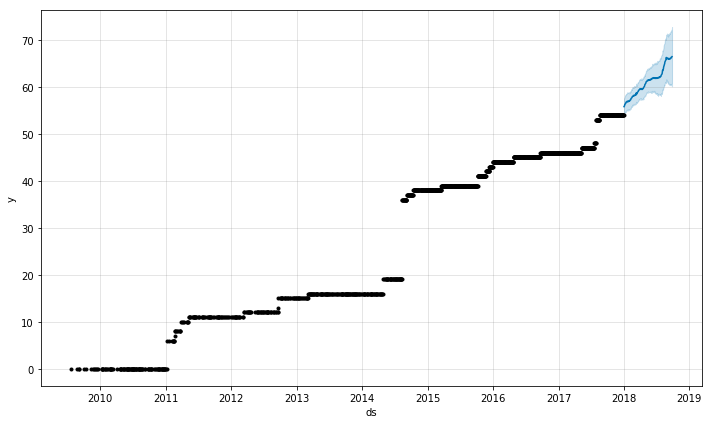

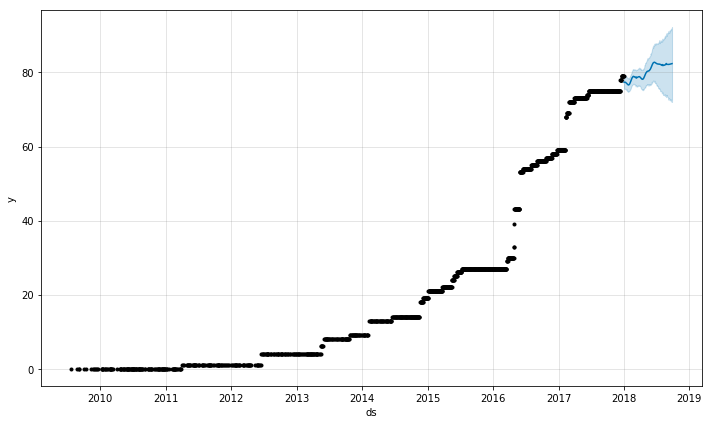

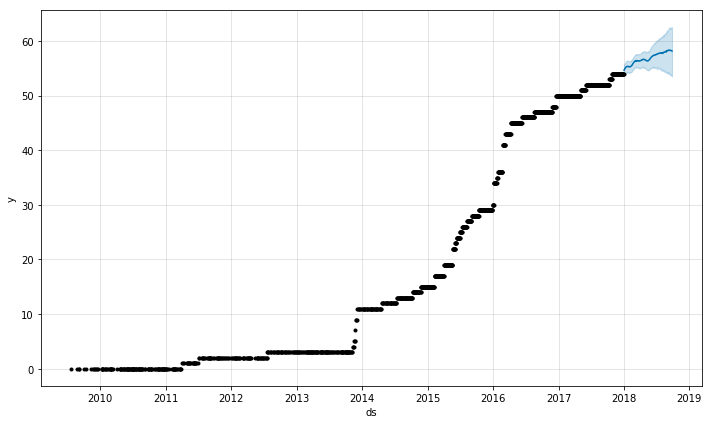

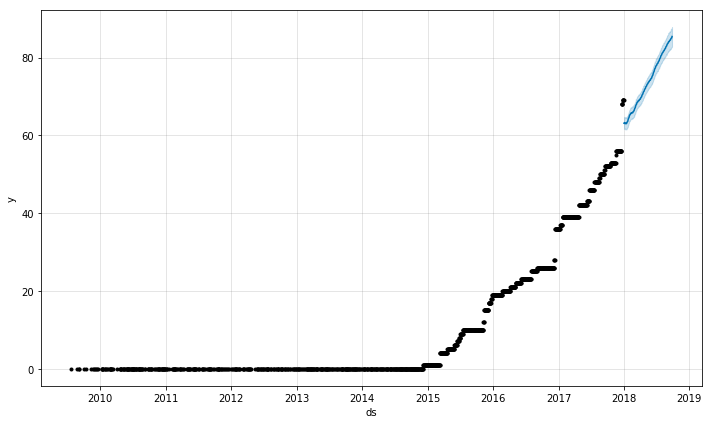

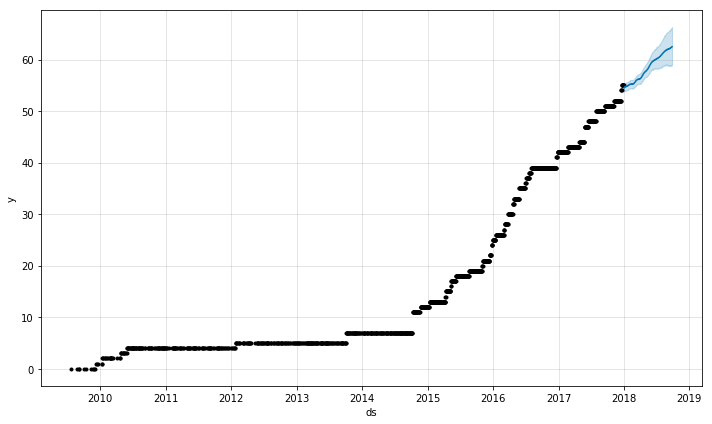

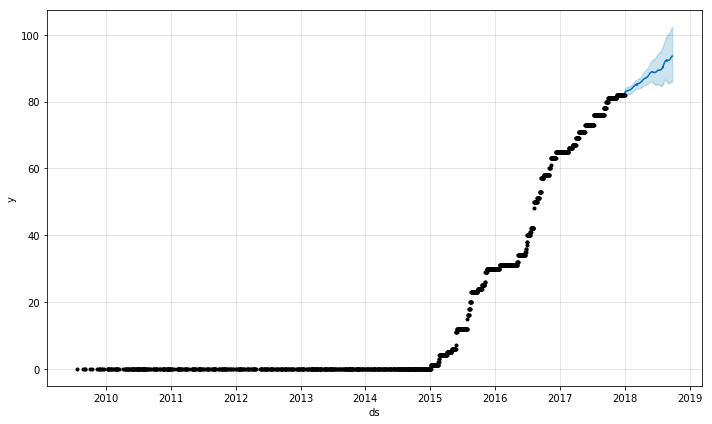

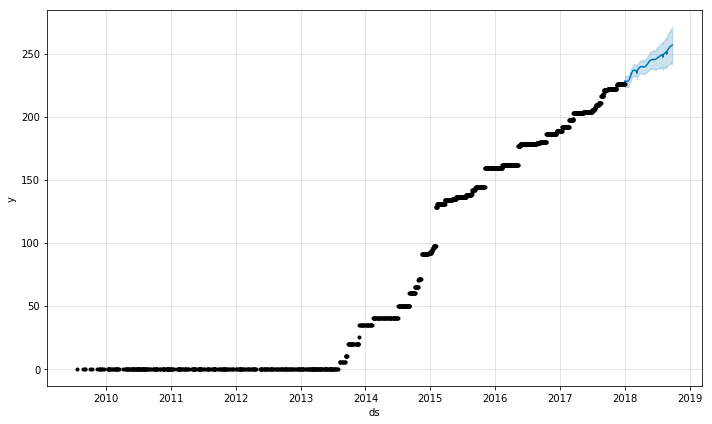

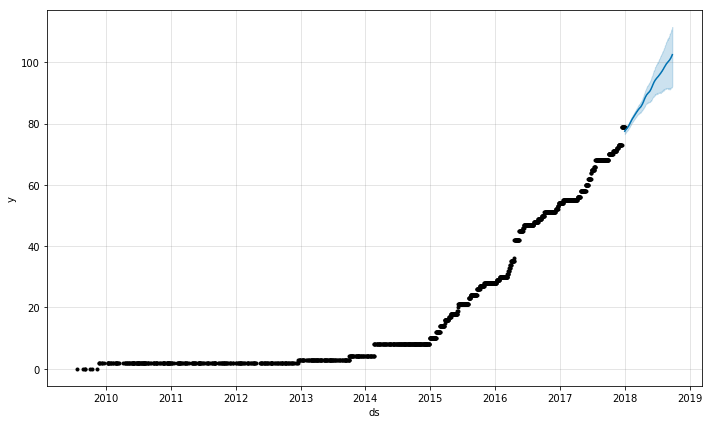

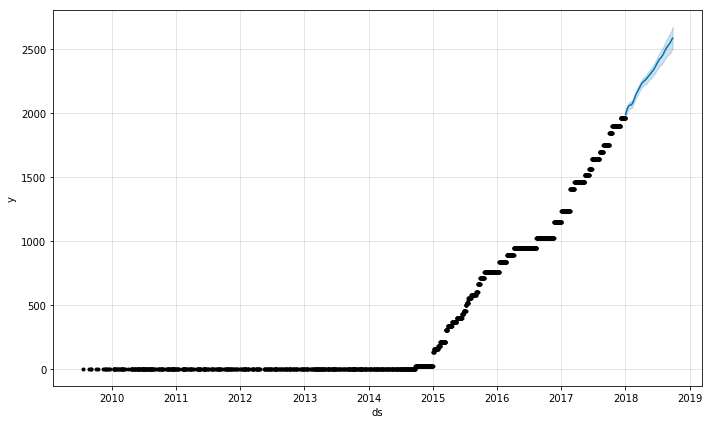

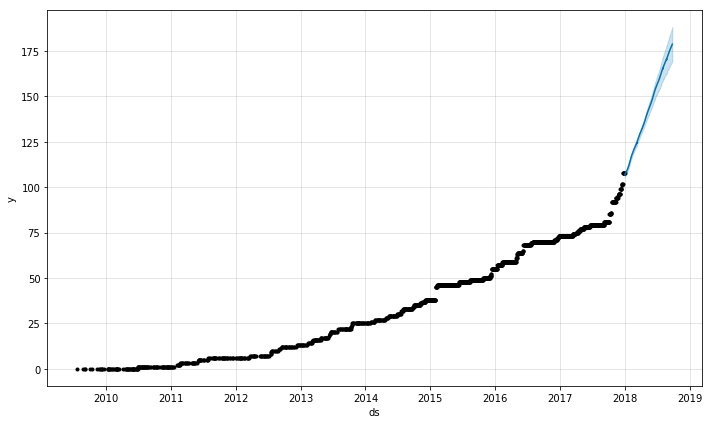

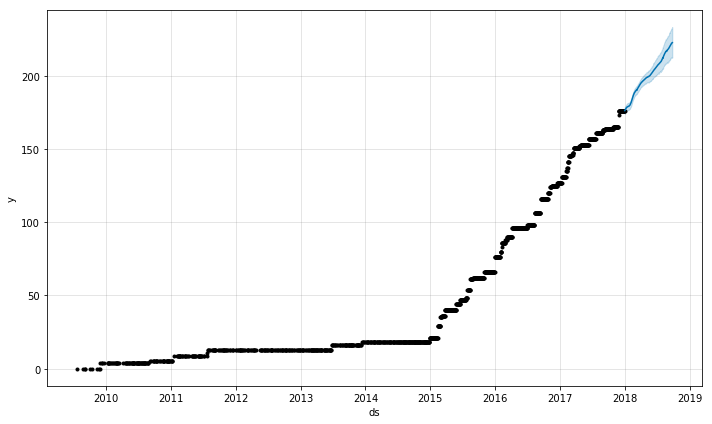

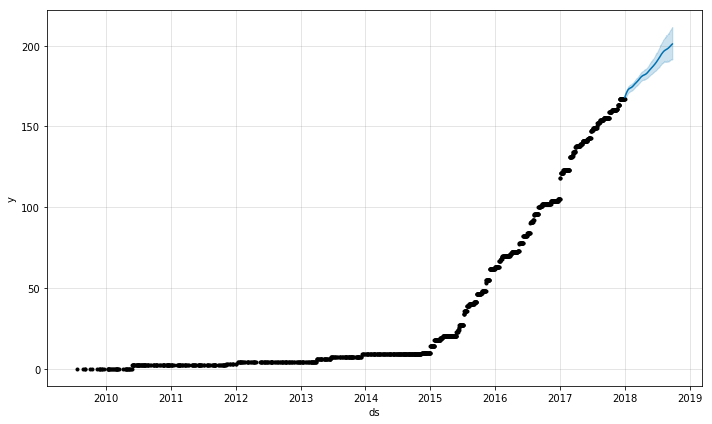

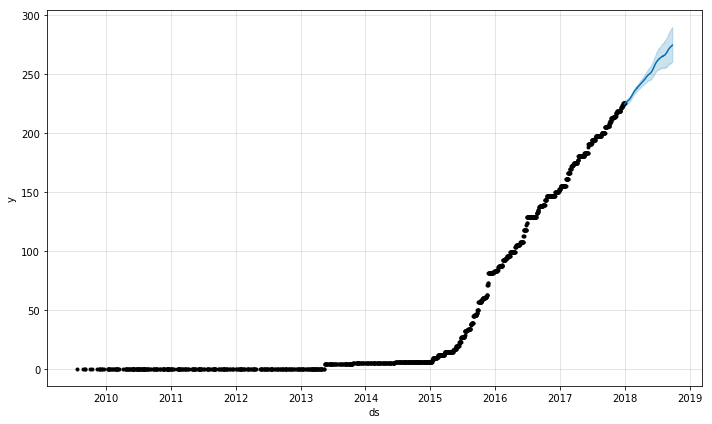

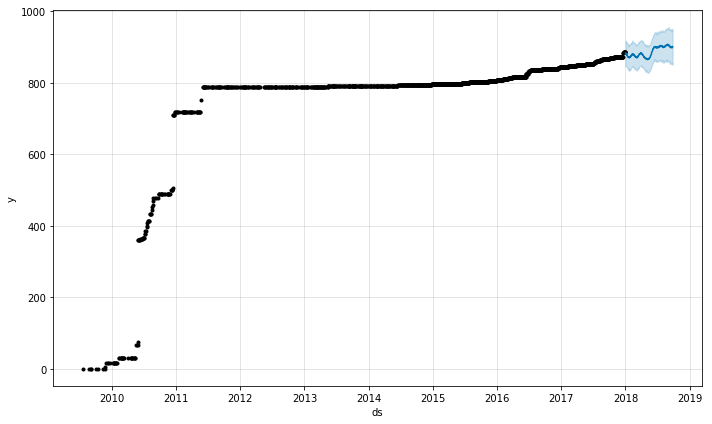

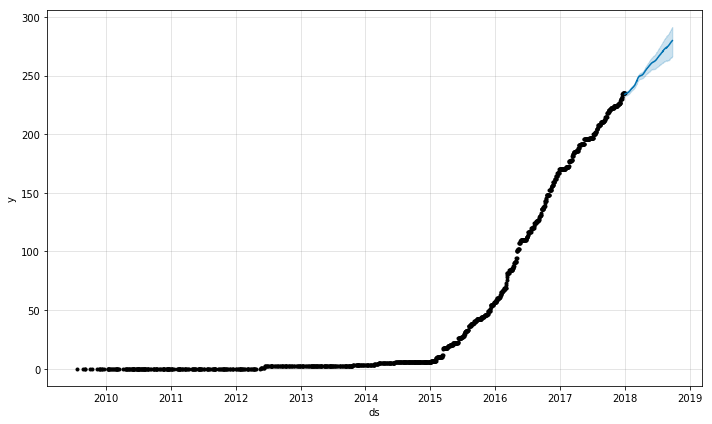

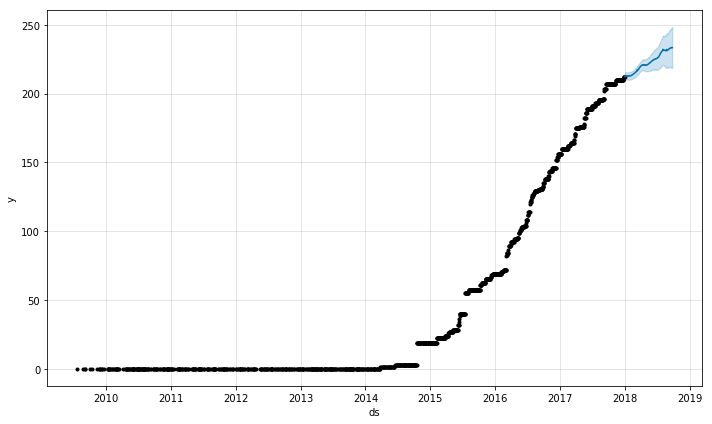

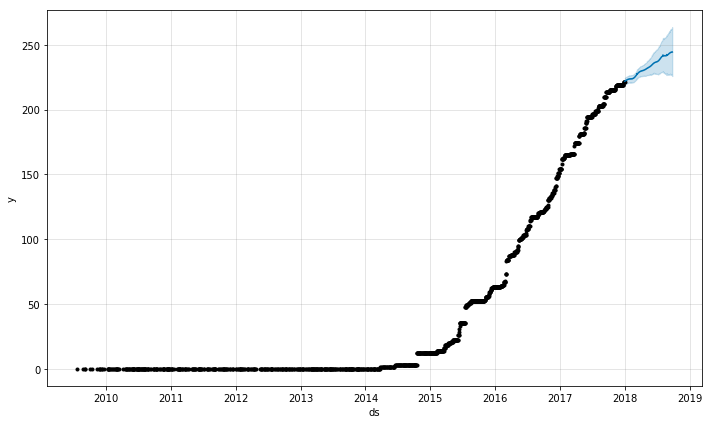

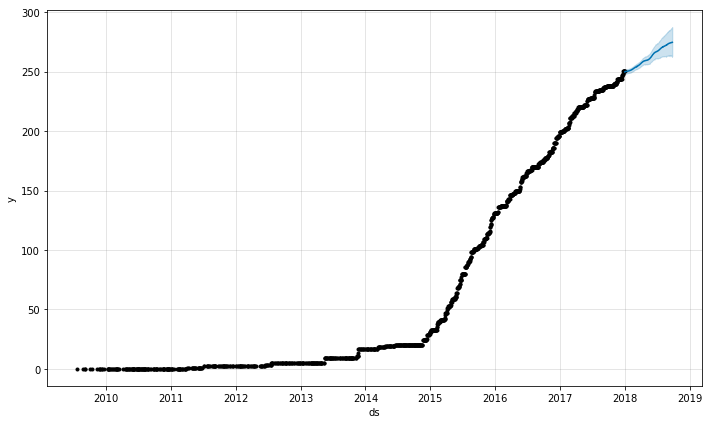

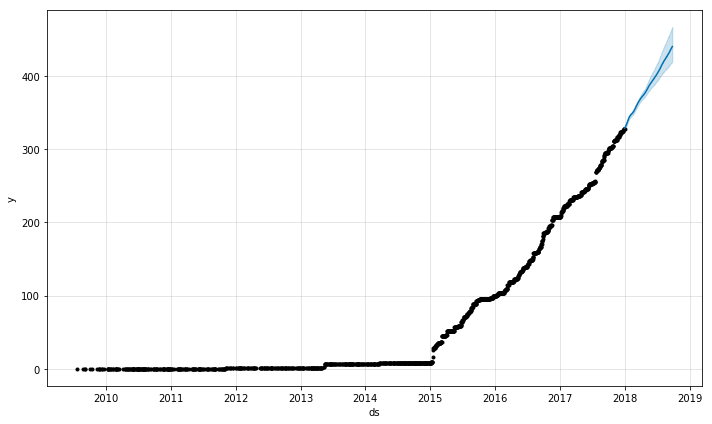

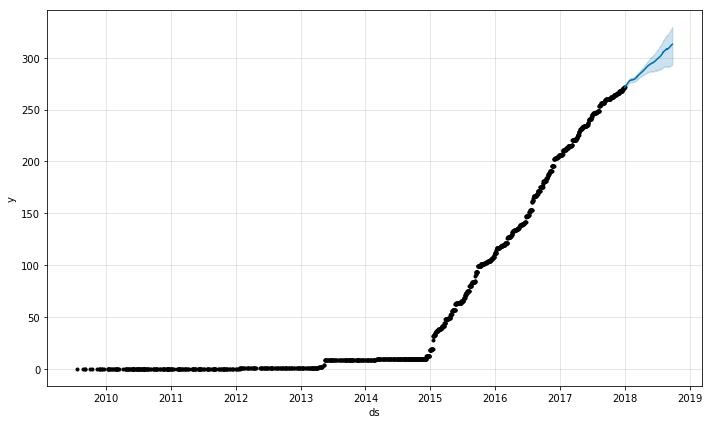

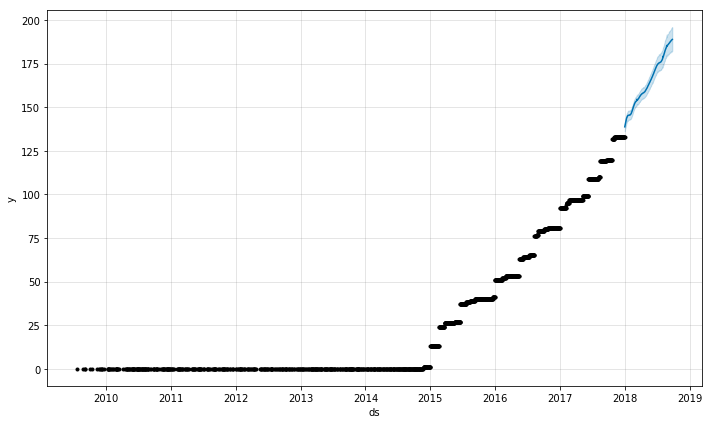

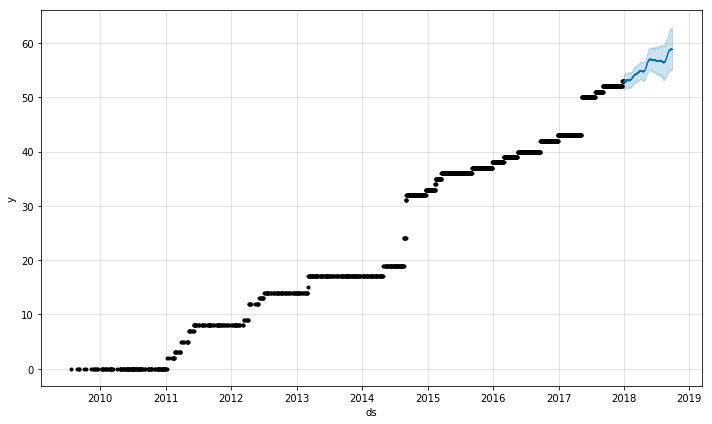

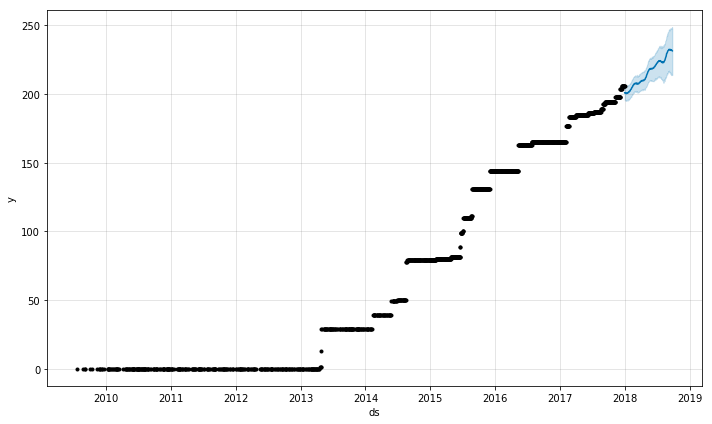

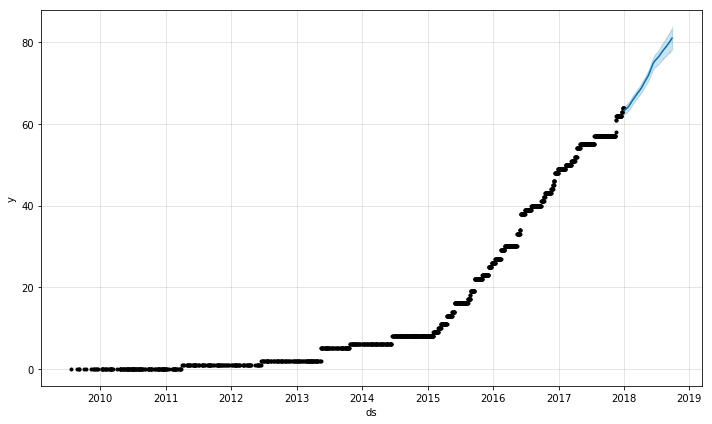

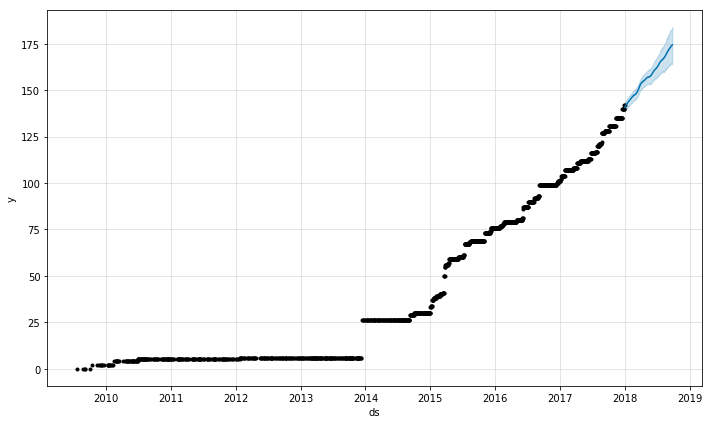

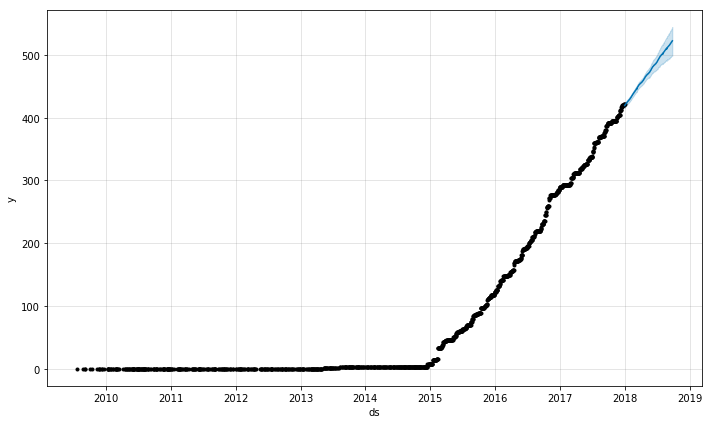

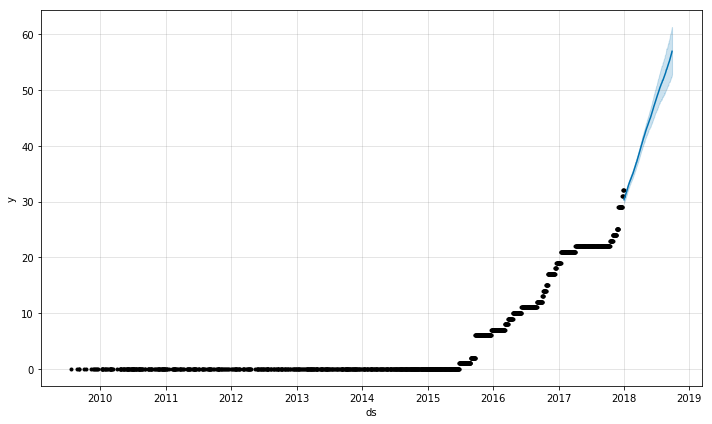

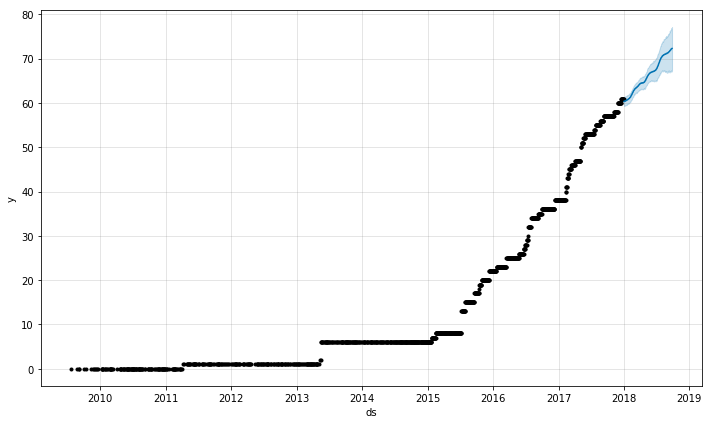

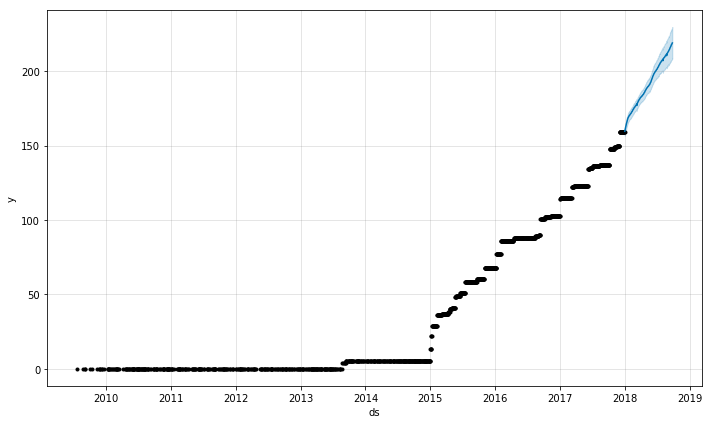

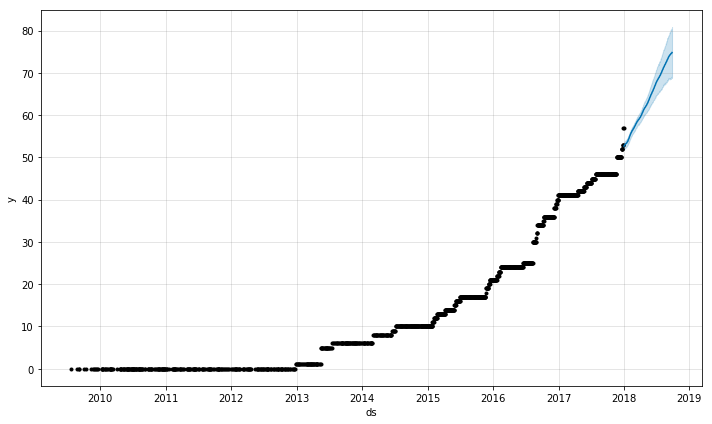

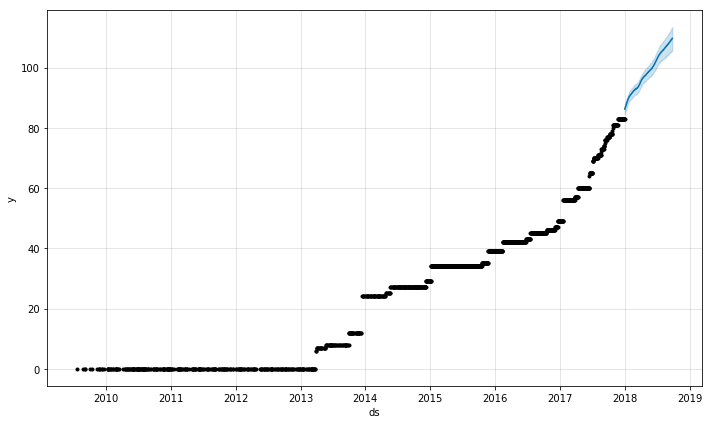

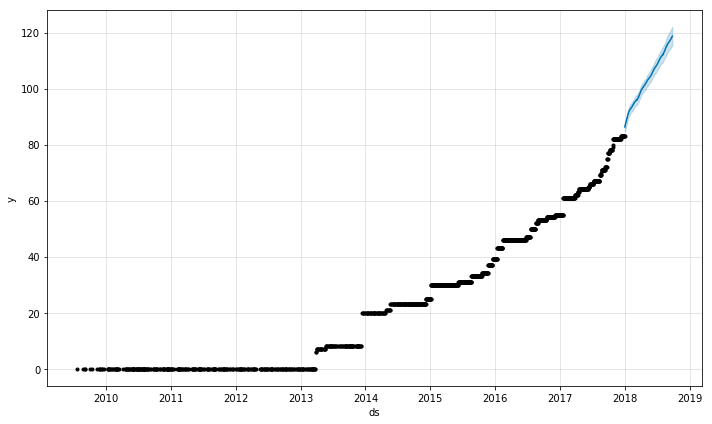

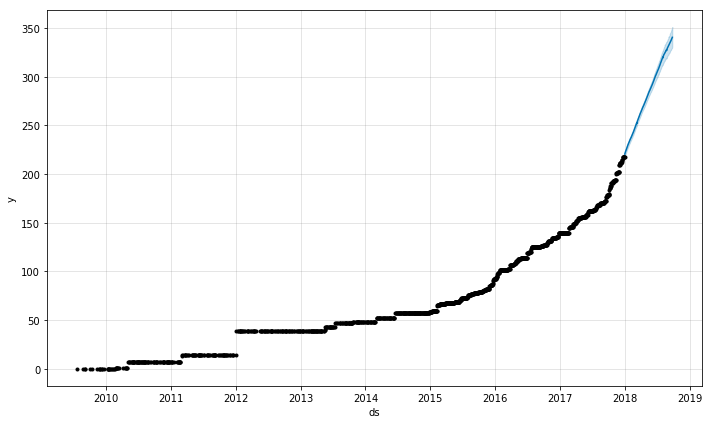

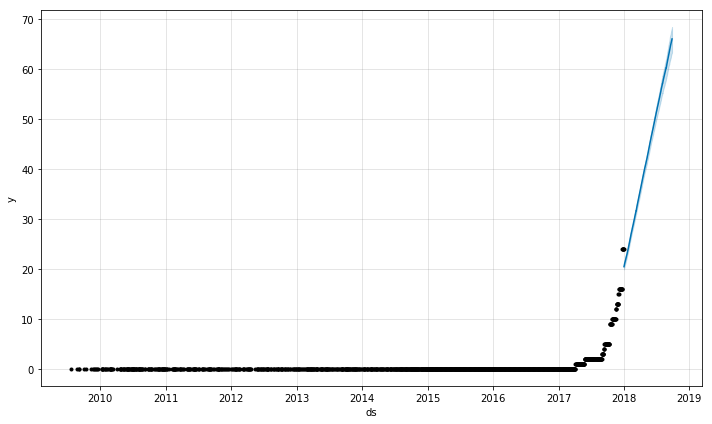

In [32]:
f=pd.read_csv('LRU_order_among_the_years.csv', header=1)


# delete the first line 
f=f.drop(f.index[0])
f.reset_index(drop=True, inplace=True)

#choose the spare part we want, delete other colomns  and change the formula to do ''Prophet'' training
for PARA in list1_final:
    df=f[['LRU',PARA]]
    df['ds'] = df['LRU']
    df['y'] = df[PARA]
    df = df.drop(['LRU',PARA],axis=1)
    ## do the sum of commandes and get the new list  
    Sum_Aberaeron = df
    Sum_Aberaeron.reset_index(drop=True, inplace=True)
    Sum_Aberaeron['ds'] = pd.to_datetime(Sum_Aberaeron['ds'])
    Sum_Aberaeron.sort_values('ds',inplace=True)
    Sum_Aberaeron['cumsum']=Sum_Aberaeron['y'].cumsum()
    Sum_Aberaeron['y']=Sum_Aberaeron['cumsum']
    Sum_Aberaeron  =Sum_Aberaeron.drop(['cumsum'],axis=1)
    
    # split the training set and test set: training :'from 2009 to '20171231' , testing :'from 20180101 to '20180926' 
    train=Sum_Aberaeron[Sum_Aberaeron['ds']<'20180101']
    test=Sum_Aberaeron[Sum_Aberaeron['ds']>'20171231']
    
    #prophet traing
    m = Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=1, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000)
    m.fit(train)
    forecast = m.predict(test)
    m.plot(forecast)
     # calculate the grow rate in year 2018  for both the true data and prediction
    firstday = forecast[forecast['ds']=='20180101']
    lastday = forecast[forecast['ds']=='20180926']
    agg_2018_pre= (lastday['yhat'].values[0] - firstday['yhat'].values[0])
    #print(PARA+' predicted command number in 2018 : ' +str(agg_2018_pre))

    # print("Generalization error: %g"%(1.-rf.score(Xtest,ytest)))

    firstday_test = test[test['ds']=='20180101']
    lastday_test = test[test['ds']=='20180926']
    agg_2018 = (lastday_test['y'].values[0] - firstday_test['y'].values[0])
    #print(PARA+' true command number in 2018: ' + str(agg_2018))

    #calculate the prediction error
    error=np.abs(agg_2018-agg_2018_pre)/agg_2018 
    print(PARA+' PREDICT_error: ' + str(error ))

The pieces which can be well predicted are approximativement continu functions. The orders come from time to time. The less points in the nearest linear part before predict part, the greater change_point_range is needed.

# Analyse 2: what kind of pieces can not be well predicted by Prophet ?

/home/tianyi/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/tianyi/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override th

Alliance PREDICT_error: 0.9736780536123405


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Ankeny PREDICT_error: 1.57559533460595


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Chelan PREDICT_error: 100.41711366495352


/home/tianyi/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in double_scalars
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cleveland Heights PREDICT_error: inf


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alice PREDICT_error: 0.9959814592221824


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Ammon PREDICT_error: 1.0013931527616338


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alpine PREDICT_error: 1.0


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Erie PREDICT_error: 5.535159676767211


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alamogordo PREDICT_error: 2.4717816870001905


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fletcher PREDICT_error: 1.747406136056128


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alamo Heights PREDICT_error: 2.014439596171241


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Altus PREDICT_error: 0.9979548075234096


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Campbellsville PREDICT_error: inf


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cartersville PREDICT_error: 2.7086420893703576


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cloquet PREDICT_error: inf


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


College Park PREDICT_error: 27.373948200737715


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Glenolden PREDICT_error: 1.837234782737124


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Benton PREDICT_error: inf


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elberton PREDICT_error: 1.4195413478349341


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Catford PREDICT_error: 1.0112488634775332


/home/tianyi/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Bennettsville PREDICT_error: inf


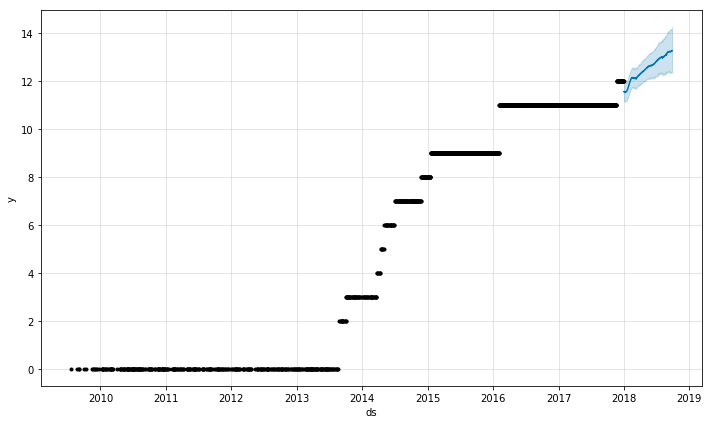

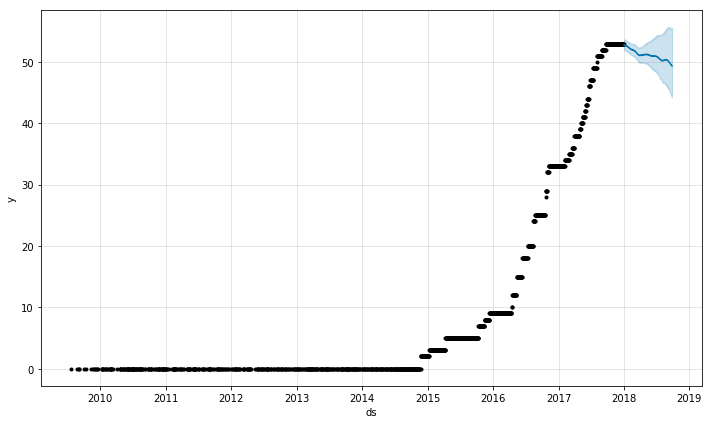

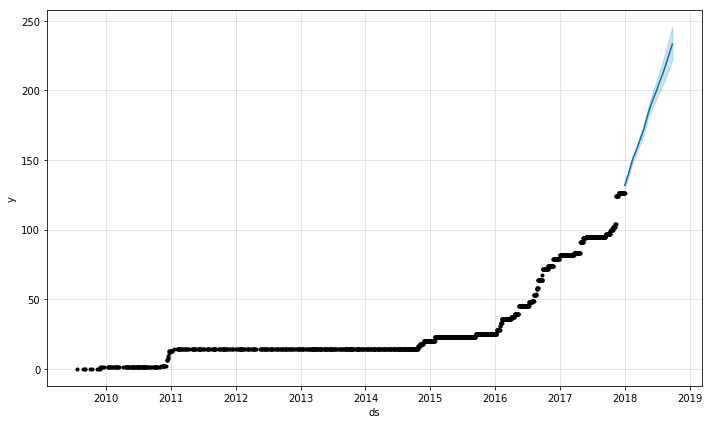

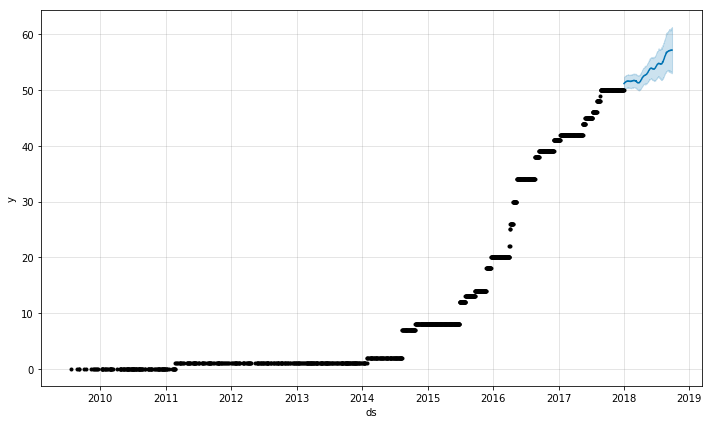

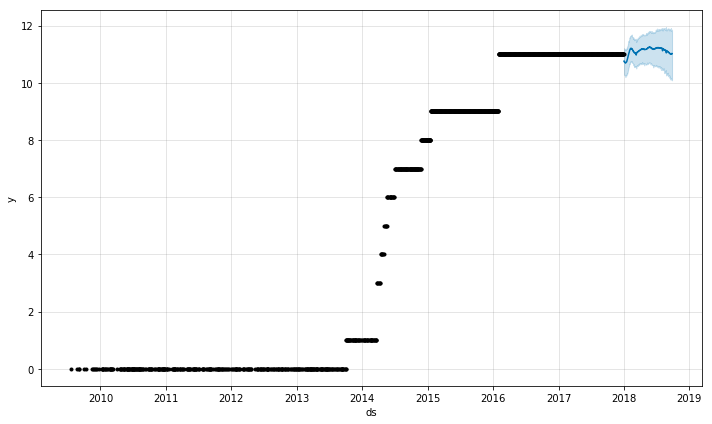

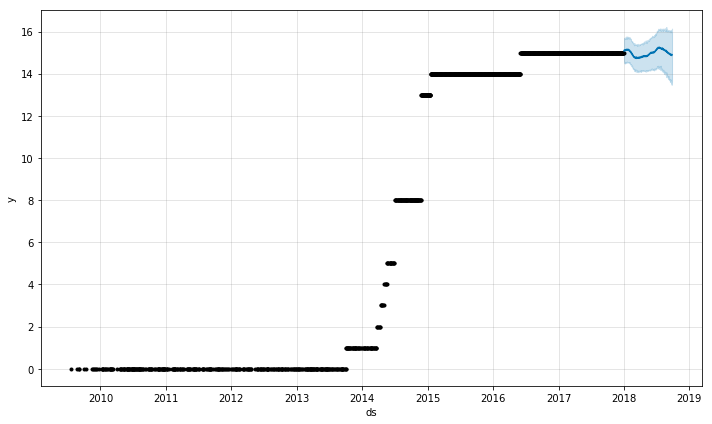

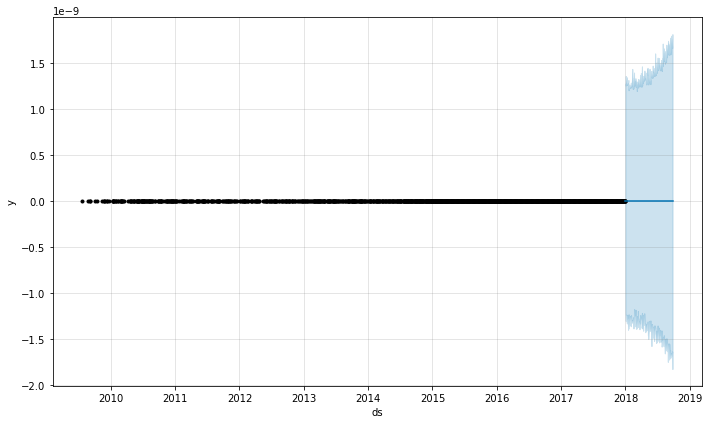

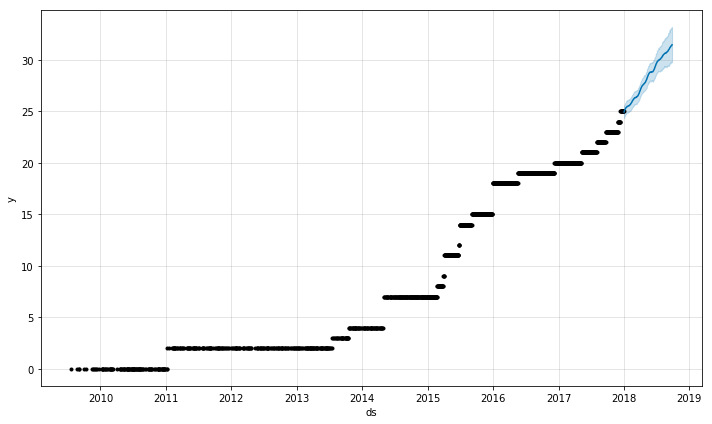

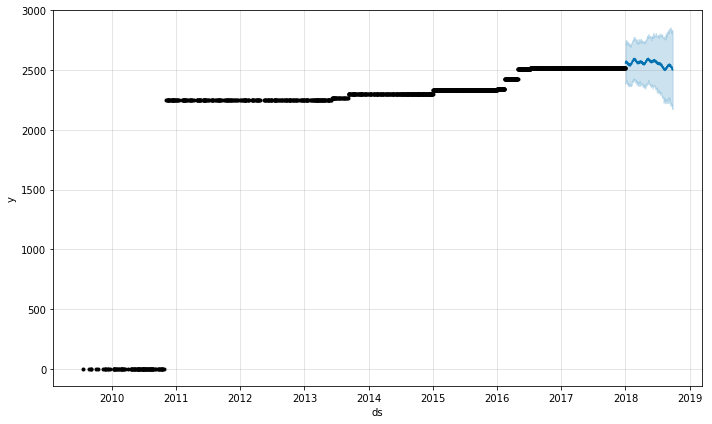

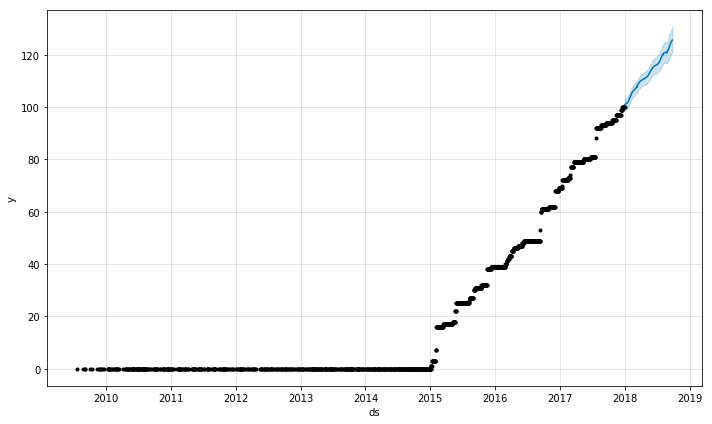

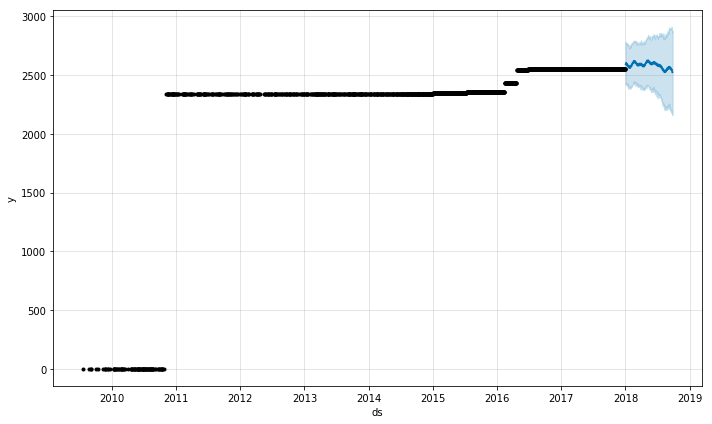

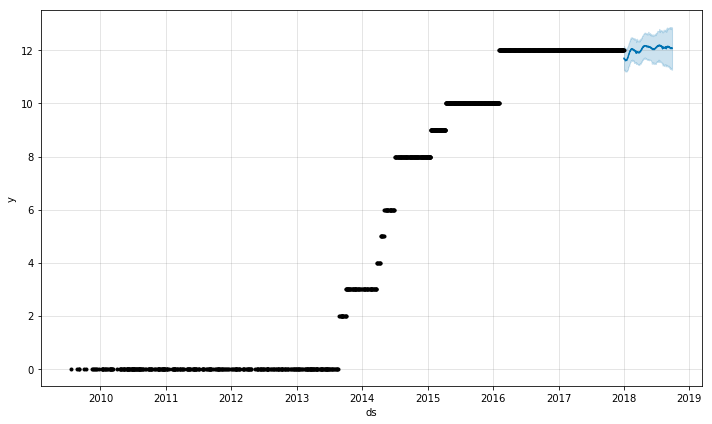

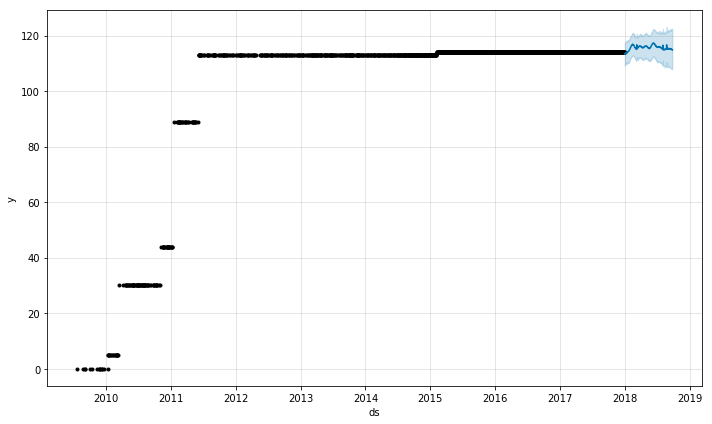

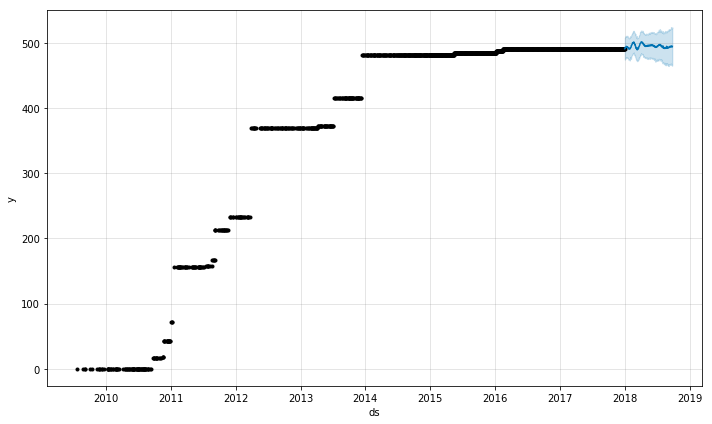

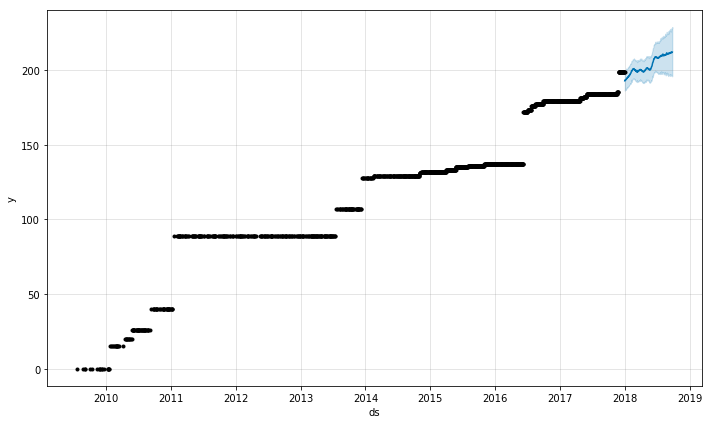

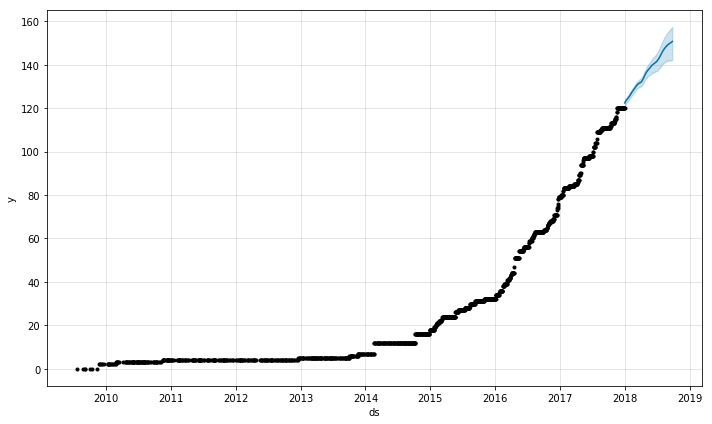

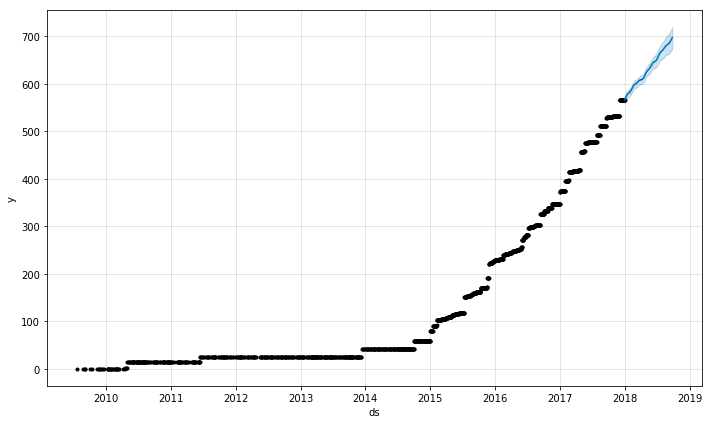

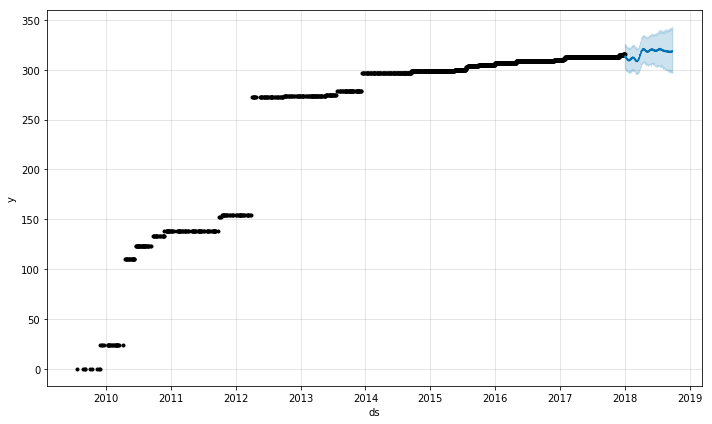

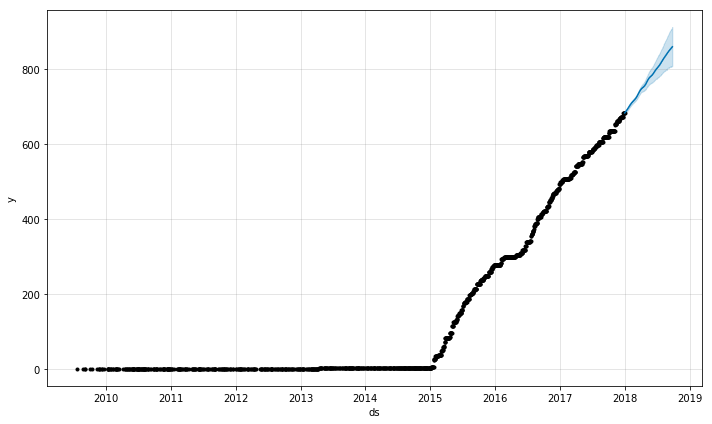

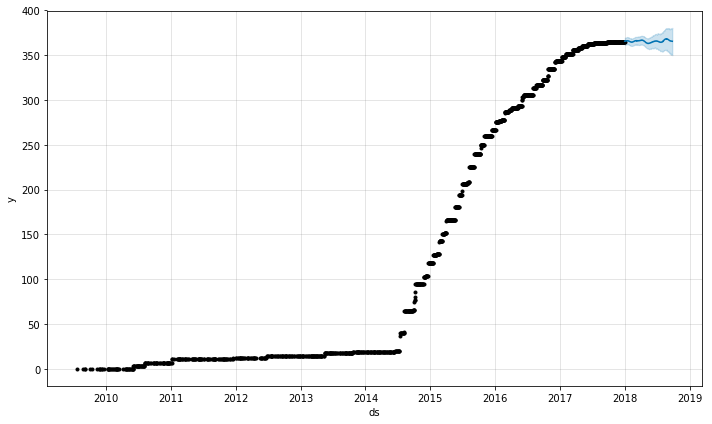

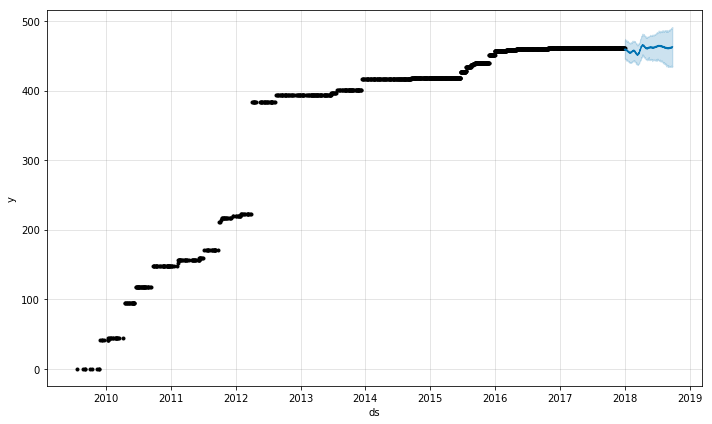

In [28]:
f=pd.read_csv('LRU_order_among_the_years.csv', header=1)


# delete the first line 
f=f.drop(f.index[0])
f.reset_index(drop=True, inplace=True)

#choose the spare part we want, delete other colomns  and change the formula to do ''Prophet'' training
for PARA in worst_4:
    df=f[['LRU',PARA]]
    df['ds'] = df['LRU']
    df['y'] = df[PARA]
    df = df.drop(['LRU',PARA],axis=1)
    ## do the sum of commandes and get the new list  
    Sum_Aberaeron = df
    Sum_Aberaeron.reset_index(drop=True, inplace=True)
    Sum_Aberaeron['ds'] = pd.to_datetime(Sum_Aberaeron['ds'])
    Sum_Aberaeron.sort_values('ds',inplace=True)
    Sum_Aberaeron['cumsum']=Sum_Aberaeron['y'].cumsum()
    Sum_Aberaeron['y']=Sum_Aberaeron['cumsum']
    Sum_Aberaeron  =Sum_Aberaeron.drop(['cumsum'],axis=1)
    
    # split the training set and test set: training :'from 2009 to '20171231' , testing :'from 20180101 to '20180926' 
    train=Sum_Aberaeron[Sum_Aberaeron['ds']<'20180101']
    test=Sum_Aberaeron[Sum_Aberaeron['ds']>'20171231']
    
    #prophet traing
    m = Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=1, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000)
    m.fit(train)
    forecast = m.predict(test)
    m.plot(forecast)
     # calculate the grow rate in year 2018  for both the true data and prediction
    firstday = forecast[forecast['ds']=='20180101']
    lastday = forecast[forecast['ds']=='20180926']
    agg_2018_pre= (lastday['yhat'].values[0] - firstday['yhat'].values[0])
    #print(PARA+' predicted command number in 2018 : ' +str(agg_2018_pre))

    # print("Generalization error: %g"%(1.-rf.score(Xtest,ytest)))

    firstday_test = test[test['ds']=='20180101']
    lastday_test = test[test['ds']=='20180926']
    agg_2018 = (lastday_test['y'].values[0] - firstday_test['y'].values[0])
    #print(PARA+' true command number in 2018: ' + str(agg_2018))

    #calculate the prediction error
    error=np.abs(agg_2018-agg_2018_pre)/agg_2018 
    print(PARA+' PREDICT_error: ' + str(error ))

From the images we can find that, for most pieces which can not be well predicted, their order functions are approximatively picewise linear. We can't describe the orders of these pieces by using just one slope and the offer augment in a sudden. What's more, many of these pieces have no order in 2017(the year just befor the prediction). Since we utilise the linear hypothese in Prophet, the non-linear can't be well simulated.

# What can we do for the pieces not so good?

In [56]:
f=pd.read_csv('LRU_order_among_the_years.csv', header=1)


# delete the first line 
f=f.drop(f.index[0])
f.reset_index(drop=True, inplace=True)

list1_6 = []
list2_6 = []
list3_6 = []
worst_6 = []
error_list = []

#choose the spare part we want, delete other colomns  and change the formula to do ''Prophet'' training
for PARA in list3_final:
    df=f[['LRU',PARA]]
    df['ds'] = df['LRU']
    df['y'] = df[PARA]
    df = df.drop(['LRU',PARA],axis=1)
    df_m=df[df['y']!=0]
    ## do the sum of commandes and get the new list  
    Sum_Aberaeron = df_m
    Sum_Aberaeron.reset_index(drop=True, inplace=True)
    Sum_Aberaeron['ds'] = pd.to_datetime(Sum_Aberaeron['ds'])
    Sum_Aberaeron.sort_values('ds',inplace=True)
    Sum_Aberaeron['cumsum']=Sum_Aberaeron['y'].cumsum()
    Sum_Aberaeron['y']=Sum_Aberaeron['cumsum']
    Sum_Aberaeron  =Sum_Aberaeron.drop(['cumsum'],axis=1)
    
    # split the training set and test set: training :'from 2009 to '20171231' , testing :'from 20180101 to '20180926' 
    train_m=Sum_Aberaeron[Sum_Aberaeron['ds']<'20180101']
    
    ## do the sum of commandes and get the new list  
    Sum_Aberaeron = df
    Sum_Aberaeron.reset_index(drop=True, inplace=True)
    Sum_Aberaeron['ds'] = pd.to_datetime(Sum_Aberaeron['ds'])
    Sum_Aberaeron.sort_values('ds',inplace=True)
    Sum_Aberaeron['cumsum']=Sum_Aberaeron['y'].cumsum()
    Sum_Aberaeron['y']=Sum_Aberaeron['cumsum']
    Sum_Aberaeron  =Sum_Aberaeron.drop(['cumsum'],axis=1)
    train=Sum_Aberaeron[Sum_Aberaeron['ds']<'20180101']
    test=Sum_Aberaeron[Sum_Aberaeron['ds']>'20171231']
    
    if(train_m.shape[0]<2):
        continue
    #prophet traing
    m = Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.5, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=10)
    m.fit(train_m)
    forecast = m.predict(test)
    #m.plot(forecast)
    # calculate the grow rate in year 2018  for both the true data and prediction
    firstday = forecast[forecast['ds']=='20180101']
    lastday = forecast[forecast['ds']=='20180926']
    agg_2018_pre= (lastday['yhat'].values[0] - firstday['yhat'].values[0])
    #print(PARA+' predicted command number in 2018 : ' +str(agg_2018_pre))

    # print("Generalization error: %g"%(1.-rf.score(Xtest,ytest)))

    firstday_test = test[test['ds']=='20180101']
    lastday_test = test[test['ds']=='20180926']
    agg_2018 = (lastday_test['y'].values[0] - firstday_test['y'].values[0])
    #print(PARA+' true command number in 2018: ' + str(agg_2018))

    #calculate the prediction error
    error=np.abs(agg_2018-agg_2018_pre)/agg_2018 
    print(PARA+' PREDICT_error: ' + str(error ))
    
    error_list.append(error)
    if error<0.1:
        list1_6.append(PARA)
    else:
        if error<0.4:
            list2_6.append(PARA)
        else:
            if error<0.9:
                list3_6.append(PARA)
            else:
                worst_6.append(PARA)

/home/tianyi/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/tianyi/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/tianyi/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

Darlington PREDICT_error: 0.546105113916211


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 10.0.


Dayton PREDICT_error: 0.00681864237152984


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 20.0.


Bucyrus PREDICT_error: 0.7063439481929605


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 12.0.


Groveland PREDICT_error: 0.9271363815826732


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 16.0.


Galesburg PREDICT_error: 0.6635946506247472


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 17.0.


Gloucester City PREDICT_error: 0.572299975019001


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 5.0.


Charleston PREDICT_error: 17.62075031005094


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 13.0.


Columbus PREDICT_error: 0.7327315032006597


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 13.0.


Grenoble PREDICT_error: 1.4102314544986314


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 19.0.


Buckeye PREDICT_error: 0.29057292890198644


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 19.0.


Cullman PREDICT_error: 0.2561377641655651


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 16.0.


Elkton PREDICT_error: 1.189614850664336


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 5.0.


Davidson PREDICT_error: 0.3930340608391529


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


Florida City PREDICT_error: 1.0326806048287107


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Grayslake PREDICT_error: 0.5354302894730602


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 12.0.


El Monte PREDICT_error: 0.36271576242348563


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 17.0.


Benton Harbor PREDICT_error: 0.1459601382875021


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 16.0.


Fountain Inn PREDICT_error: 0.7746359087286923


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elkin PREDICT_error: 0.6134477242866029


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


Bensenville PREDICT_error: 0.5192977817302582


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.


Carteret PREDICT_error: 0.22760294266857467


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bryan PREDICT_error: 0.6456647655282003


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 20.0.


Buellton PREDICT_error: 0.4063361303016947


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Darien PREDICT_error: 0.45973201798654445


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Grayson PREDICT_error: 0.44994128447213666


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Galax PREDICT_error: 0.12896661207108337


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Farmington PREDICT_error: 0.497731383388942


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Dardenne Prairie PREDICT_error: 0.5330283115707746


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 15.0.


Grosse Pointe Park PREDICT_error: 23.91570451430034


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cahokia PREDICT_error: 0.37352352294264024


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cedarburg PREDICT_error: 0.3444861116814627


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Canal Fulton PREDICT_error: 0.7968365259959206


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cheney PREDICT_error: 0.5671013390329014


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 12.0.


Catasauqua PREDICT_error: 1.1130570259797639


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Collegeville PREDICT_error: 0.6528514172108477


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elburn PREDICT_error: 0.41443143073683825


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Collingdale PREDICT_error: 0.5484796236080974


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cheraw PREDICT_error: 0.39308293473423156


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Crockett PREDICT_error: 0.33674569041592295


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 17.0.


Fowler PREDICT_error: 1.1233333588053753


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 9.0.


Floresville PREDICT_error: 3.408636834562952


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 11.0.


Gramercy PREDICT_error: 21.72746903908005


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 13.0.


Fountain Valley PREDICT_error: 0.14144644687389984


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 12.0.


Fairfield PREDICT_error: 4.555307262676866


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cave Creek PREDICT_error: 0.06218981351335313


As looking for linear function, this time we try to delate the dates where there are no order in the training set. And this method does work for some examples.
However, this method doesn't work well for the worst list, where the order are too limited to be used in prediction.

In [52]:
list1_5

['Gloucester City', 'Farmington', 'Crockett']

In [53]:
list2_5

['Dayton',
 'Buckeye',
 'Cullman',
 'Davidson',
 'El Monte',
 'Carteret',
 'Galax',
 'Cahokia',
 'Cedarburg',
 'Collegeville',
 'Elburn',
 'Collingdale',
 'Cheraw',
 'Gramercy']

In [57]:
list1_6

['Dayton', 'Cave Creek']

In [58]:
list2_6

['Buckeye',
 'Cullman',
 'Davidson',
 'El Monte',
 'Benton Harbor',
 'Carteret',
 'Galax',
 'Cahokia',
 'Cedarburg',
 'Cheraw',
 'Crockett',
 'Fountain Valley']